<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)
require(readxl)
install.packages('skimr')
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
meta <- read_xlsx("/content/sample_data/metadata.xlsx",sheet = 1)
hdl <- read_tsv("/content/sample_data/high_density_lipids.tsv")
ldl <- read_tsv("/content/sample_data/low_density_lipids.tsv")

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
install.packages("boot")
library("boot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("bootstrap")
library("bootstrap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("coin")
library("coin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml




In [11]:
my_func <- function(x,i){return(sum(x[i]/length(x[i])))}

In [30]:
result <- boot(meta$HDLi...31,my_func,R = 999)
print(result)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = meta$HDLi...31, statistic = my_func, R = 999)


Bootstrap Statistics :
    original       bias    std. error
t1* 1.657143 -0.002794045  0.06616403


2.5%    97.5% 
1.108312 2.588961

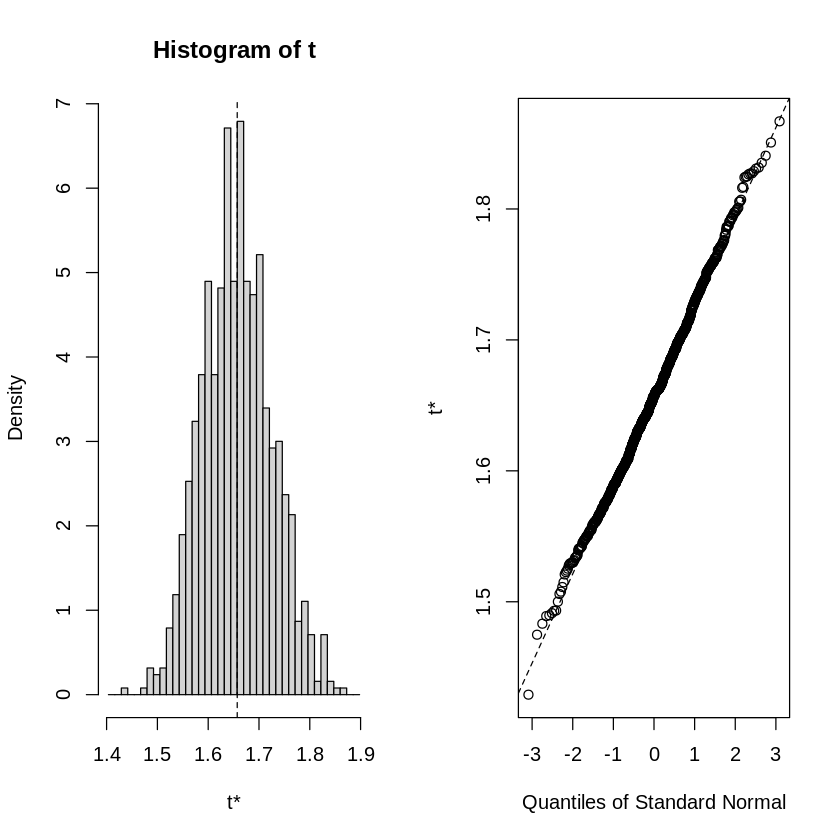

In [15]:
plot(result)
quantile(meta$HDLi...31,c(0.025,0.975))

In [28]:
mean(meta$HDLi...31)

[1] 1.657143

Среднее значение при Bootstrap и и среднее значение самого признака не отличается значительно

In [31]:
result2 <- boot(meta$Tgi...26,my_func,R = 999)
print(result2)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = meta$Tgi...26, statistic = my_func, R = 999)


Bootstrap Statistics :
    original     bias    std. error
t1* 123.3947 0.08210842    10.05548


2.5%   97.5% 
 48.875 307.750

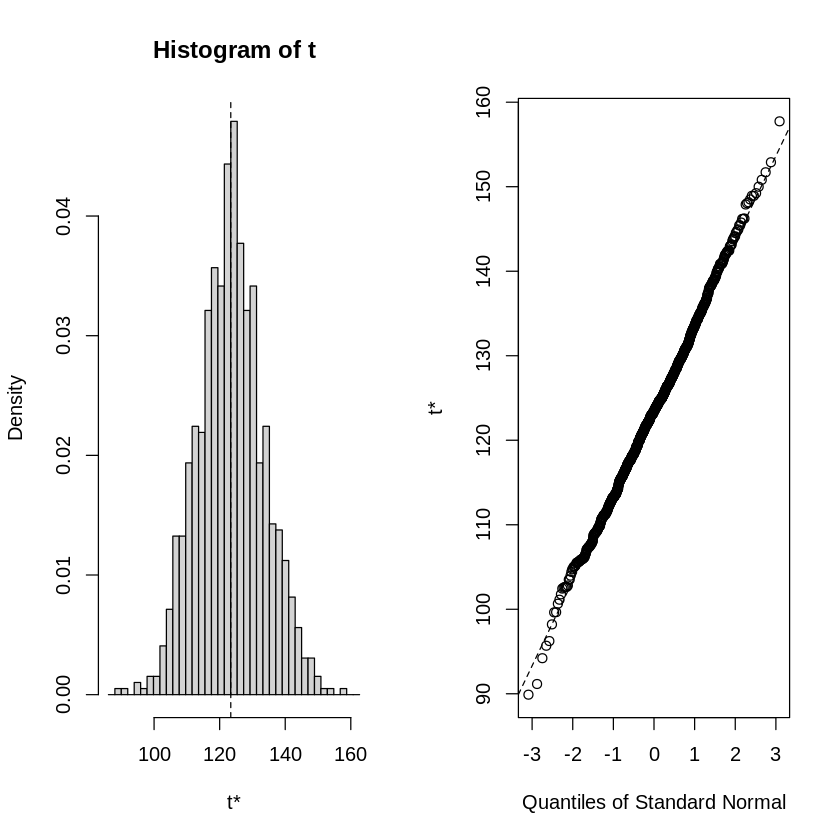

In [32]:
plot(result2)
quantile(meta$Tgi...26,c(0.025,0.975))

In [29]:
mean(meta$Tgi...26)

[1] 123.3947

In [64]:
result3 <- boot(meta$LVH,my_func,R = 9999)
print(result3)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = meta$LVH, statistic = my_func, R = 9999)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.3684211 -0.0004368858  0.07834196


In [65]:
mean(meta$LVH)

[1] 0.3684211

2.5% 97.5% 
    0     1

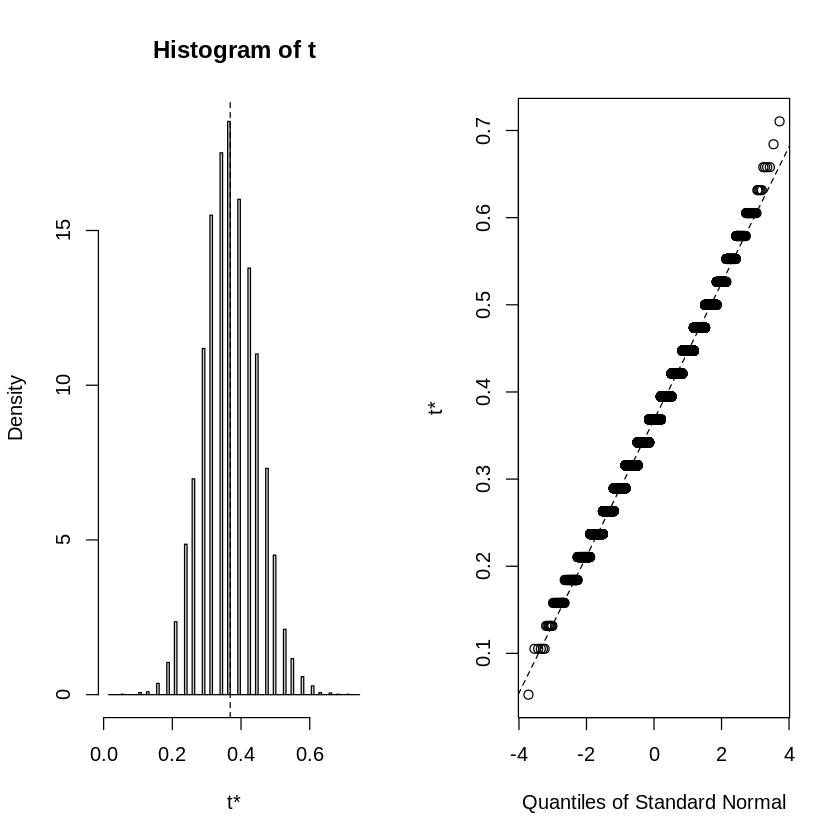

In [66]:
plot(result3)
quantile(meta$LVH,c(0.025,0.975))

In [19]:
shapiro.test(meta$Choi...25)


	Shapiro-Wilk normality test

data:  meta$Choi...25
W = 0.96942, p-value = 0.3763


In [20]:
shapiro.test(meta$HDLi...31)


	Shapiro-Wilk normality test

data:  meta$HDLi...31
W = 0.93339, p-value = 0.02568


In [21]:
shapiro.test(log10(meta$HDLi...31))


	Shapiro-Wilk normality test

data:  log10(meta$HDLi...31)
W = 0.97792, p-value = 0.6436


In [23]:
shapiro.test(log10(meta$Tgi...26))


	Shapiro-Wilk normality test

data:  log10(meta$Tgi...26)
W = 0.98019, p-value = 0.7242


In [24]:
shapiro.test(meta$LVH)


	Shapiro-Wilk normality test

data:  meta$LVH
W = 0.61174, p-value = 8.182e-09


In [26]:
shapiro.test(log(meta$LVH))


	Shapiro-Wilk normality test

data:  log(meta$LVH)
W = NaN, p-value = NA


In [38]:
my_func_w <- function(x,w){return(sum(w*x)/length(x))}

In [39]:
result_w <- boot(meta$HDLi...31,my_func_w,R = 999)
print(result_w)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = meta$HDLi...31, statistic = my_func_w, R = 999)


Bootstrap Statistics :
    original     bias    std. error
t1* 32.90417 -0.4887724    3.086304


2.5%      95% 
1.108312 2.461039

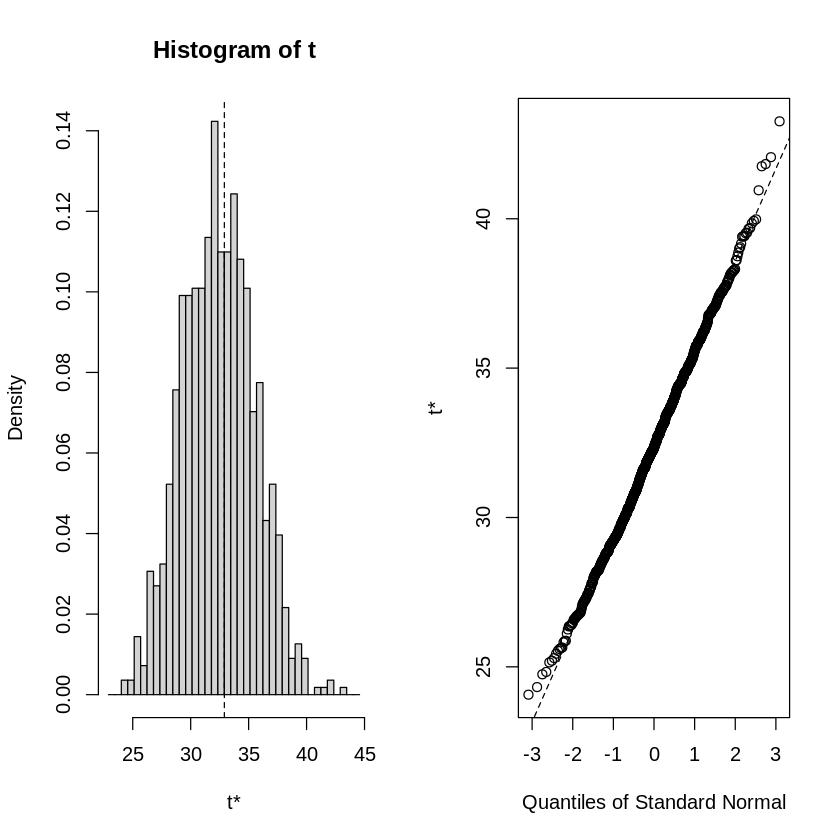

In [40]:
plot(result_w)
quantile(meta$HDLi...31,c(0.025,0.95))

***JackKnife***

In [41]:
t_func <- function(x){mean(x)}

In [57]:
shapiro.test(meta$HDLi...31)


	Shapiro-Wilk normality test

data:  meta$HDLi...31
W = 0.93339, p-value = 0.02568


In [58]:
j_wick <- jackknife(meta$HDLi...31,t_func)
print(j_wick)

$jack.se
[1] 0.06825209

$jack.bias
[1] 0

$jack.values
 [1] 1.656090 1.665356 1.674833 1.665497 1.648017 1.658477 1.659038 1.661916
 [9] 1.654826 1.668936 1.626114 1.656371 1.670762 1.660583 1.668796 1.654194
[17] 1.671744 1.667111 1.663461 1.632432 1.655107 1.645419 1.643103 1.660372
[25] 1.666199 1.635942 1.640646 1.653492 1.657775 1.657564 1.669709 1.640505
[33] 1.665918 1.653843 1.654616 1.662689 1.657775 1.666199

$call
jackknife(x = meta$HDLi...31, theta = t_func)



In [59]:
mean(j_wick$jack.values)

[1] 1.657143

In [63]:
mean(meta$HDLi...31)

[1] 1.657143

Warning message in geom_vline(xintercept = mean(meta$HDLi...31), color = "red", :
“Ignoring unknown parameters: `pty`”
Warning message in geom_vline(xintercept = mean(j_wick$jack.values), color = "purple", :
“Ignoring unknown parameters: `pty`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


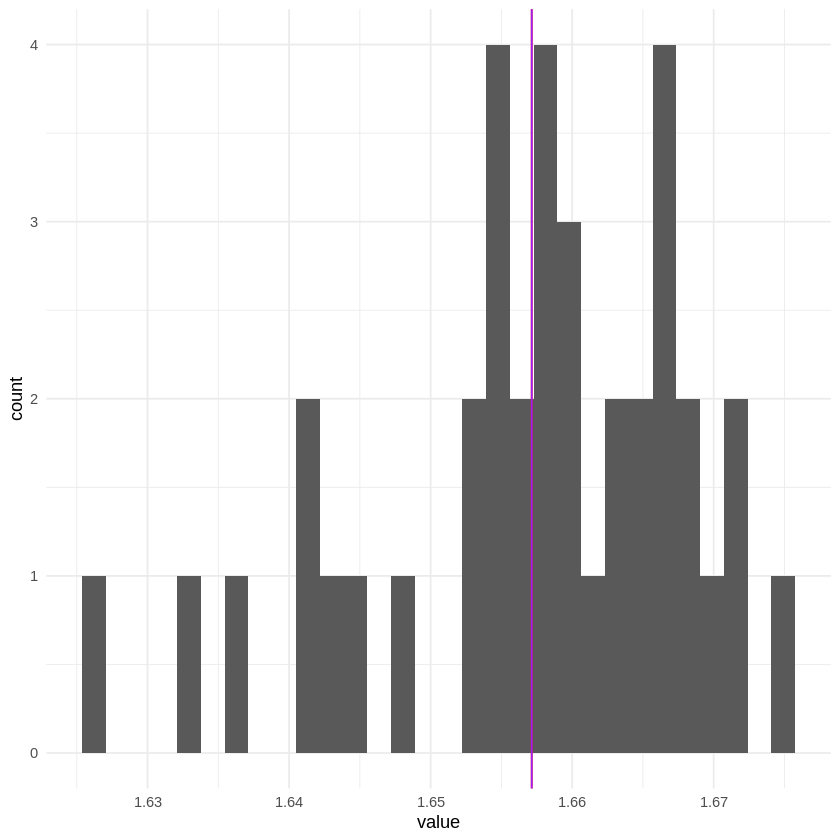

In [61]:
ggplot(as.tibble(j_wick$jack.values),aes(value)) +
  geom_histogram() +
  geom_vline(xintercept = mean(meta$HDLi...31), color = 'red', pty = 2) +
  geom_vline(xintercept = mean(j_wick$jack.values), color = 'purple', pty = 2) +
  theme_minimal()


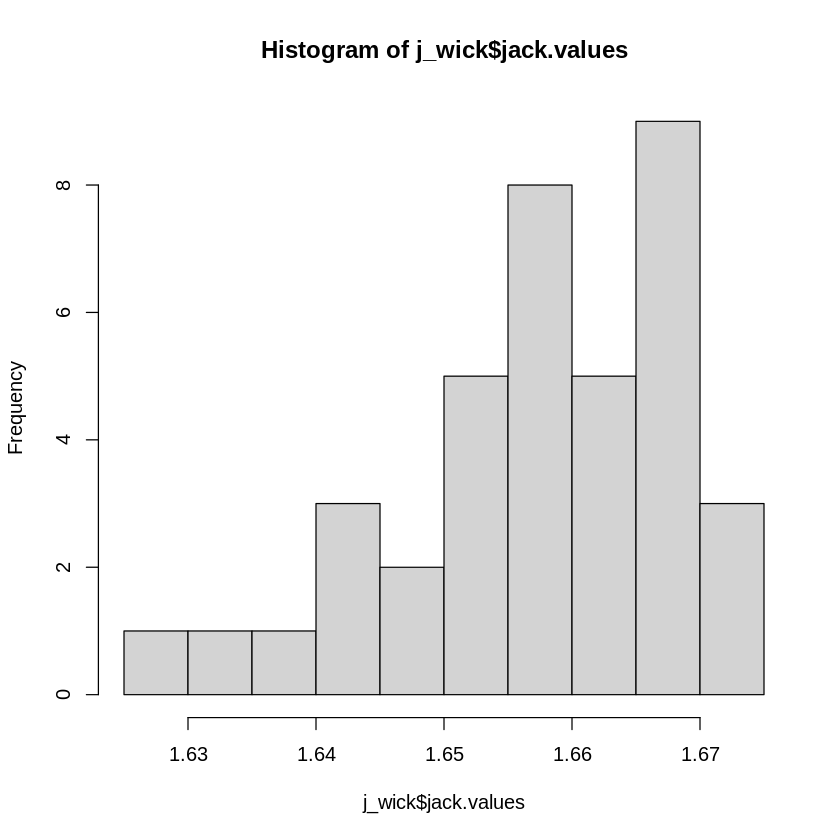

In [62]:
hist(j_wick$jack.values)

# Permutation

In [76]:
res <- coin::normal_test(LDLi...28 ~ factor(HT),data = meta,conf.int = TRUE)
print(res)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  LDLi...28 by factor(HT) (0, 1)
Z = -0.81075, p-value = 0.4175
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -40  11
sample estimates:
difference in location 
                  -8.5 



In [78]:
res2 <- coin::normal_test(LDLi...28 ~ factor(Dm),data = meta,conf.int = TRUE)
print(res2)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  LDLi...28 by factor(Dm) (0, 1)
Z = 1.1917, p-value = 0.2334
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -25  60
sample estimates:
difference in location 
                    31 



In [79]:
res3 <- coin::normal_test(LDLi...28 ~ factor(LVH),data = meta,conf.int = TRUE)
print(res3)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  LDLi...28 by factor(LVH) (0, 1)
Z = -0.78808, p-value = 0.4306
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -40  16
sample estimates:
difference in location 
                    -8 



In [84]:
res3 <- coin::normal_test(HDLi...31 ~ factor(IHD),data = meta,conf.int = TRUE)
print(res3)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  HDLi...31 by factor(IHD) (0, 1)
Z = 1.897, p-value = 0.05783
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -0.01558441  0.46493506
sample estimates:
difference in location 
             0.2051948 



In [85]:
t.test(HDLi...31 ~ factor(IHD),data = meta,conf.int = TRUE)


	Welch Two Sample t-test

data:  HDLi...31 by factor(IHD)
t = 1.5814, df = 35.751, p-value = 0.1226
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.05983933  0.48307925
sample estimates:
mean in group 0 mean in group 1 
       1.762953        1.551333 


# There are differences between p-values of Permutation and T-test but anyway we cannot reject null hypothesis

In [97]:
meta %>%
  slice_sample(n = 20) %>%
  coin::normal_test(HDLi...31 ~ factor(IHD),data = .,conf.int = TRUE)
meta %>%
  slice_sample(n = 20) %>%
  t.test(HDLi...31 ~ factor(IHD),data = .,conf.int = TRUE)


	Asymptotic Two-Sample van der Waerden (Normal Quantile) Test

data:  HDLi...31 by factor(IHD) (0, 1)
Z = 0.48439, p-value = 0.6281
alternative hypothesis: true mu is not equal to 0
95 percent confidence interval:
 -0.2987013  0.3116883
sample estimates:
difference in location 
            0.03376623 



	Welch Two Sample t-test

data:  HDLi...31 by factor(IHD)
t = 0.41762, df = 17.373, p-value = 0.6813
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.2888357  0.4316929
sample estimates:
mean in group 0 mean in group 1 
       1.711688        1.640260 


In [89]:
summary(aov(HDLi...31 ~ factor(IHD),data = meta))

            Df Sum Sq Mean Sq F value Pr(>F)
factor(IHD)  1  0.425  0.4254   2.501  0.123
Residuals   36  6.124  0.1701               

In [90]:
summary(aov(LDLi...28 ~ factor(Dm),data = meta))

            Df Sum Sq Mean Sq F value Pr(>F)
factor(Dm)   1   2049    2049    1.28  0.265
Residuals   36  57646    1601               

In [91]:
summary(aov(LDLi...28 ~ factor(LVH),data = meta))

            Df Sum Sq Mean Sq F value Pr(>F)
factor(LVH)  1    699   699.1   0.427  0.518
Residuals   36  58996  1638.8               

In [96]:
meta %>%
  slice_sample(n = 20) %>%
  coin::normal_test(HDLi...31 ~ factor(Sys),data = .,conf.int = TRUE)


	Asymptotic K-Sample van der Waerden (Normal Quantile) Test

data:  HDLi...31 by
	 factor(Sys) (100, 103, 110, 112, 118, 124, 126, 128, 130, 132, 133, 134, 135, 142, 147, 150, 165)
chi-squared = 17.777, df = 16, p-value = 0.3371


In [98]:
meta %>%
  slice_sample(n = 20) %>%
  coin::normal_test(HDLi...31 ~ factor(Sys),data = .,conf.int = TRUE)


	Asymptotic K-Sample van der Waerden (Normal Quantile) Test

data:  HDLi...31 by
	 factor(Sys) (118, 120, 124, 125, 126, 128, 129, 130, 132, 134, 135, 140, 142, 147, 150)
chi-squared = 15.457, df = 14, p-value = 0.3476


In [99]:
res4 <- coin::normal_test(BMI ~ factor(Age),data = meta,conf.int = TRUE)
print(res4)


	Asymptotic K-Sample van der Waerden (Normal Quantile) Test

data:  BMI by
	 factor(Age) (47, 50, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 75, 76, 79, 83)
chi-squared = 22.488, df = 23, p-value = 0.491



Результаты вашего теста показывают значение статистики критерия (chi-squared), количество степеней свободы (df) и p-значение. В данном случае p-значение равно 0.491, что означает, что нет достаточных доказательств для отвержения нулевой гипотезы о равенстве распределений между группами BMI по различным возрастам при уровне значимости 0.05.